# Feature Scaling for Machine Learning

### Why Should we Use Feature Scaling?

one feature is entirely in kilograms while the other is in grams, another one is liters, and so on. How can we use these features when they vary so vastly in terms of what they’re presenting?

Gradient Descent Based Algorithms
Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. 

Distance-Based Algorithms
Distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

## What is Normalization?

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling

Rescaling, or min-max normalization, is a simple method for bringing your data into one out of two ranges: [0,1] or [a,b]. It highly involves the minimum and maximum values from the dataset in normalizing the data.

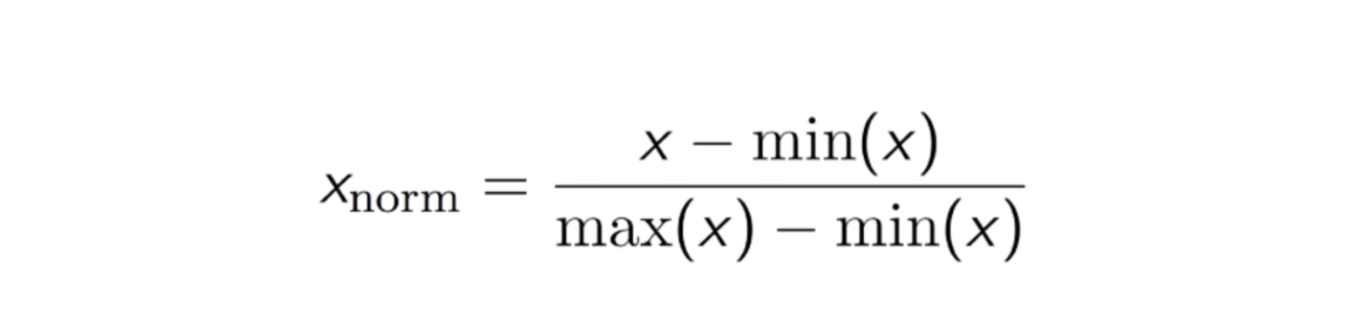

Here, Xmax and Xmin are the maximum and the minimum values of the feature respectively.

When the value of X is the minimum value in the column, the numerator will be 0, and hence X’ is 0
On the other hand, when the value of X is the maximum value in the column, the numerator is equal to the denominator and thus the value of X’ is 1
If the value of X is between the minimum and the maximum value, then the value of X’ is between 0 and 1

A value is normalized as follows:

y = (x – min) / (max – min)
Where the minimum and maximum values pertain to the value x being normalized.

For example, for a dataset, we could guesstimate the min and max observable values as 30 and -10. We can then normalize any value, like 18.8, as follows:

y = (x – min) / (max – min)
y = (18.8 – (-10)) / (30 – (-10))
y = 28.8 / 40
y = 0.72
You can see that if an x value is provided that is outside the bounds of the minimum and maximum values, the resulting value will not be in the range of 0 and 1. You could check for these observations prior to making predictions and either remove them from the dataset or limit them to the pre-defined maximum or minimum values.

You can normalize your dataset using the scikit-learn object MinMaxScaler.

Good practice usage with the MinMaxScaler and other scaling techniques is as follows:

Fit the scaler using available training data. For normalization, this means the training data will be used to estimate the minimum and maximum observable values. This is done by calling the fit() function.

Apply the scale to training data. This means you can use the normalized data to train your model. This is done by calling the transform() function.

Apply the scale to data going forward. This means you can prepare new data in the future on which you want to make predictions.

The default scale for the MinMaxScaler is to rescale variables into the range [0,1], although a preferred scale can be specified via the “feature_range” argument and specify a tuple, including the min and the max for all variables.

## What is Standardization?

Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

Here’s the formula for standardization:

This can be thought of as subtracting the mean value or centering the data.

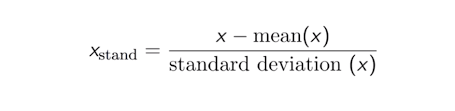

A value is standardized as follows:

y = (x – mean) / standard_deviation
Where the mean is calculated as:

mean = sum(x) / count(x)
And the standard_deviation is calculated as:

standard_deviation = sqrt( sum( (x – mean)^2 ) / count(x))

We can guesstimate a mean of 10.0 and a standard deviation of about 5.0. Using these values, we can standardize the first value of 20.7 as follows:

y = (x – mean) / standard_deviation
y = (20.7 – 10) / 5
y = (10.7) / 5
y = 2.14

The mean and standard deviation estimates of a dataset can be more robust to new data than the minimum and maximum.

You can standardize your dataset using the scikit-learn object StandardScaler.

Standardization assumes that your observations fit a Gaussian distribution (bell curve) with a well-behaved mean and standard deviation. You can still standardize your data if this expectation is not met, but you may not get reliable results.

Note that in this case, the values are not restricted to a particular range.

### Implementing Feature Scaling in Python

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = np.array([1.0, 12.4, 3.9, 10.4])

For [0,2]

In [3]:
normalize_Data=(data-np.min(data))/(np.max(data) - np.min(data))
normalize_Data

array([0.        , 1.        , 0.25438596, 0.8245614 ])

For [a, b]
If instead we wanted to scale it to some other arbitrary range – say [0,1.5], we can apply min-max normalization but then for the [a,b] range, where a and b can be chosen yourself.

We can use the following formula for normalization:

In [4]:
a = 0
b = 1.5

normalize_Data = a + ((data - np.min(data)) * (b - a) / (np.max(data) - np.min(data)))
print(normalize_Data)

[0.         1.5        0.38157895 1.23684211]


## Applying the MinMaxScaler from Scikit-learn

In [5]:
from sklearn.preprocessing import MinMaxScaler
dataset = np.array([1.0, 12.4, 3.9, 10.4]).reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1.5))
scaler.fit(dataset)
normalized_dataset = scaler.transform(dataset)
print(normalized_dataset)

[[0.        ]
 [1.5       ]
 [0.38157895]
 [1.23684211]]


## Standardization (Z-scale normalization)

we normalized our dataset based on the minimum and maximum values. Mean and standard deviation are however not standard, meaning that the mean is zero and that the standard deviation is one.

The formula for standardization is as follows:

standardized_dataset = (dataset - mean(dataset)) / standard_deviation(dataset)

we subtract the mean and divide by the standard deviation. By removing the mean from each sample, we effectively move the samples towards a mean of 0 (after all, we removed it from all samples). In addition, by dividing by the standard deviation, we yield a dataset where the values describe by how much of the standard deviation they are offset from the mean.

In [6]:
data = np.array([1.0, 2.0, 3.0, 3.0, 3.0, 2.0, 1.0])
standardized_data= (data - np.average(data)) / (np.std(data))
print(standardized_data)
print(np.mean(data))
print(np.mean(standardized_data))

[-1.37198868 -0.17149859  1.02899151  1.02899151  1.02899151 -0.17149859
 -1.37198868]
2.142857142857143
3.172065784643304e-17


In [7]:
import numpy as np
from sklearn.preprocessing import StandardScaler
dataset = np.array([1.0, 2.0, 3.0, 3.0, 3.0, 2.0, 1.0]).reshape(-1, 1)
scaler = StandardScaler()
scaler.fit(dataset)
standardized_dataset = scaler.transform(dataset)
print(standardized_dataset)
print(np.mean(standardized_dataset))
print(np.std(standardized_dataset))

[[-1.37198868]
 [-0.17149859]
 [ 1.02899151]
 [ 1.02899151]
 [ 1.02899151]
 [-0.17149859]
 [-1.37198868]]
3.172065784643304e-17
1.0


### use min-max normalization if you want to normalize the data while keeping some differences in scales (because units remain different), and use standardization if you want to make scales comparable (through standard deviations).

In [5]:
import seaborn as sns

In [6]:
df=sns.load_dataset("iris")

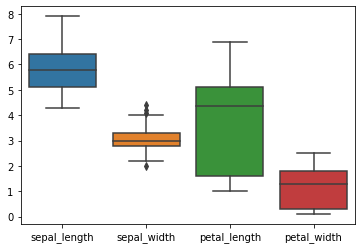

In [7]:
sns.boxplot(data=df)

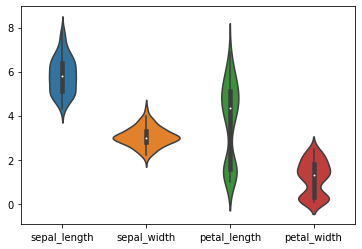

In [28]:
sns.violinplot(data=df)

In [11]:
df=df.drop(columns=["species"])

In [12]:
scaler=MinMaxScaler()

In [13]:
norm_data=scaler.fit_transform(df)

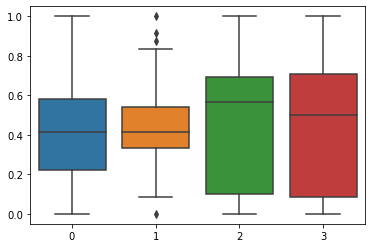

In [14]:
sns.boxplot(data=norm_data)

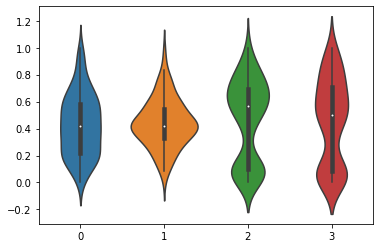

In [29]:
sns.violinplot(data=norm_data)

In [15]:
scale_data=scaler.fit_transform(df)

In [16]:
scale_data

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [17]:
new_df=pd.DataFrame(scale_data)

In [18]:
new_df

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [19]:
new_df=pd.DataFrame(scale_data,columns=df.columns)

In [20]:
new_df

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


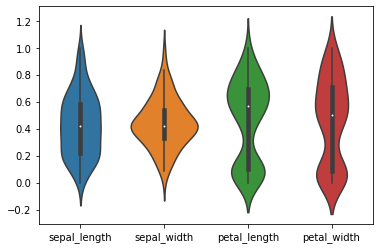

In [31]:
sns.violinplot(data=new_df)

In [21]:
scaler=StandardScaler()

In [22]:
scale_data=scaler.fit_transform(df)

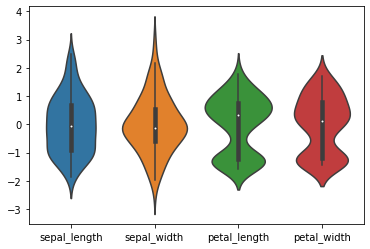

In [30]:
sns.violinplot(data=new_df1)

In [23]:
new_df1=pd.DataFrame(scale_data,columns=df.columns)
new_df1

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832
